In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 

import matplotlib.pyplot as plt

In [3]:
df_togo = pd.read_csv('../data/cleaned/togo-dapaong_qc_clean.csv')
df_benin = pd.read_csv('../data/cleaned/benin-malanville_clean.csv')
df_sierraleone = pd.read_csv('../data/cleaned/sierraleone-bumbuna_clean.csv')

In [4]:
df_togo['Country'] = 'Togo'
df_benin['Country'] = 'Benin'
df_sierraleone['Country'] = 'Sierra Leone'
df_all = pd.concat([df_togo, df_benin, df_sierraleone], ignore_index=True)


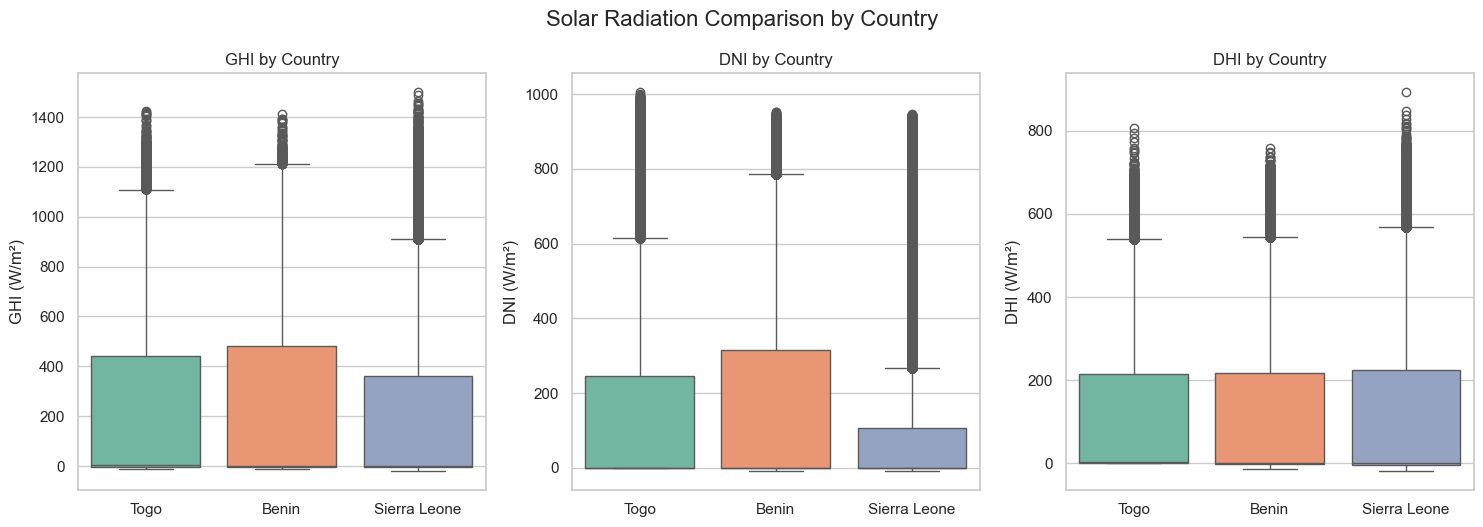

In [7]:

sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

metrics = ['GHI', 'DNI', 'DHI']

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(
        data=df_all,
        x='Country',
        y=metric,
        hue='Country',           # Explicitly assign hue
        palette='Set2',
        legend=False             # Hide duplicate legend
    )
    plt.title(f'{metric} by Country')
    plt.xlabel('')
    plt.ylabel(f'{metric} (W/m²)')

plt.tight_layout()
plt.suptitle('Solar Radiation Comparison by Country', fontsize=16, y=1.05)
plt.show()

In [9]:
# Summary statistics: mean, median, std for each metric by Country
summary_table = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
summary_table = summary_table.round(2)
print(summary_table)

                 GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52  


In [12]:
# Statistical Testing

from scipy.stats import f_oneway, kruskal

# Extract GHI values for each country
ghi_benin = df_all[df_all['Country'] == 'Benin']['GHI']
ghi_togo = df_all[df_all['Country'] == 'Togo']['GHI']
ghi_sierraleone = df_all[df_all['Country'] == 'Sierra Leone']['GHI']

# One-way ANOVA
anova_stat, anova_p = f_oneway(ghi_benin, ghi_togo, ghi_sierraleone)
print(f"One-way ANOVA p-value: {anova_p:.4e}")

# Kruskal–Wallis test (non-parametric)
kruskal_stat, kruskal_p = kruskal(ghi_benin, ghi_togo, ghi_sierraleone)
print(f"Kruskal–Wallis p-value: {kruskal_p:.4e}")

# Note: p < 0.05 indicates significant differences between countries.

One-way ANOVA p-value: 0.0000e+00
Kruskal–Wallis p-value: 0.0000e+00


* Benin exhibits the highest average GHI (240.56 W/m²) but also shows greatest variability across all radiation metrics, suggesting both high potential and instability in solar yield.

* Sierra Leone has the lowest average DNI and GHI, indicating relatively weaker direct and global solar radiation, potentially due to higher cloud cover or humidity.

* Statistical significance is confirmed by both ANOVA (p < 0.0001) and Kruskal–Wallis (p < 0.0001) tests, validating that the differences in solar radiation metrics across countries are not due to random variation.

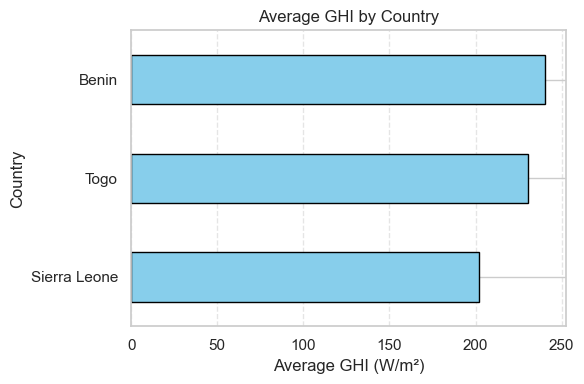

In [13]:
# Calculate average GHI per country
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(6, 4))
avg_ghi.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Average GHI by Country')
plt.xlabel('Average GHI (W/m²)')
plt.ylabel('Country')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()